![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning. 

# Classification
## k-NN

# Ko'krak saratonini aniqlash

**Tavsif:**
Ko'krak saratoni dunyodagi ayollar orasida eng keng tarqalgan saraton hisoblanadi. Bu barcha saraton holatlarining 25 foizini tashkil qiladi. Ko'krark saratoni ko'krakdagi hujayralar nazoratsiz o'sishidan boshlanadi. Ushbu hujayralar odatda rentgen nurlari orqali ko'rish mumkin bo'lgan o'simtalarni tahlil qilish orqali aniqlanadi.

**Ushbu ma'lumotlar to'plami Kaggle'dan olingan.**

In [11]:
import pandas as pd
import numpy as np

In [12]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv"
df = pd.read_csv(url)
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
342,89827,B,11.06,14.96,71.49,373.9,0.10330,0.09097,0.053970,0.033410,...,11.92,19.90,79.76,440.0,0.14180,0.22100,0.229900,0.107500,0.3301,0.09080
245,884437,B,10.48,19.86,66.72,337.7,0.10700,0.05971,0.048310,0.030700,...,11.48,29.46,73.68,402.8,0.15150,0.10260,0.118100,0.067360,0.2883,0.07748
306,89344,B,13.20,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,...,14.41,20.45,92.00,636.9,0.11280,0.13460,0.011200,0.025000,0.2651,0.08385
178,873357,B,13.01,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,...,14.00,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843
461,911296202,M,27.42,26.27,186.90,2501.0,0.10840,0.19880,0.363500,0.168900,...,36.04,31.37,251.20,4254.0,0.13570,0.42560,0.683300,0.262500,0.2641,0.07427
324,89511501,B,12.20,15.21,78.01,457.9,0.08673,0.06545,0.019940,0.016920,...,13.75,21.38,91.11,583.1,0.12560,0.19280,0.116700,0.055560,0.2661,0.07961
80,861103,B,11.45,20.97,73.81,401.5,0.11020,0.09362,0.045910,0.022330,...,13.11,32.16,84.53,525.1,0.15570,0.16760,0.175500,0.061270,0.2762,0.08851
13,846381,M,15.85,23.95,103.70,782.7,0.08401,0.10020,0.099380,0.053640,...,16.84,27.66,112.00,876.5,0.11310,0.19240,0.232200,0.111900,0.2809,0.06287
510,91550,B,11.74,14.69,76.31,426.0,0.08099,0.09661,0.067260,0.026390,...,12.45,17.60,81.25,473.8,0.10730,0.27930,0.269000,0.105600,0.2604,0.09879
302,89263202,M,20.09,23.86,134.70,1247.0,0.10800,0.18380,0.228300,0.128000,...,23.68,29.43,158.80,1696.0,0.13470,0.33910,0.493200,0.192300,0.3294,0.09469


In [13]:
df.shape

(569, 32)

Dataset ko'krakdagi o'simta haqida ma'lumotlarni jamlagan. `diagnosis` ustuni esa o'simta rak (M - malignant) yoki rak emas (B - benign) anglatadi.

In [14]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Keling bu qiymatlarni 0 va 1 ga o'zgartiramiz. M->1, B->0

Buning uchun yoki `sklearn` tarkibidagi `LabelEncoder` dan yoki `pandas` dagi `.replace()` metodidan foydalanish mumkin. Biz ikkisini ham qoldiramiz.

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'].values)
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [16]:
# df['diagnosis'] = df['diagnosis'].replace("M",1)
# df['diagnosis'] = df['diagnosis'].replace("B",0)
# df['diagnosis'].value_counts()

ID ustunini tashlab yuboramiz

In [17]:
df.drop(columns=['id'], inplace=True)

In [18]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [19]:
df.corrwith(df['diagnosis']).abs().sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

### ML ga tayyorlaymiz

In [20]:
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis']

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

## ML

In [22]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # k-ni qiymati

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
y_predict = knn.predict(X_test)

## Baholash

### Jaccard index

In [24]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

np.float64(0.8958333333333334)

### Confusion matrix

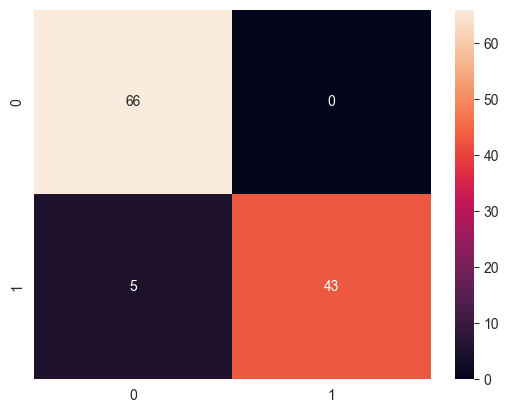

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [41]:
y_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0])

In [26]:
confusion_matrix(y_test, y_predict)

array([[66,  0],
       [ 5, 43]])

### Precision, recall, F1

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=1.0
recall=0.8958333333333334
f1=0.945054945054945
accuracy=0.956140350877193


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        66
           1       1.00      0.90      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Cross-validation yordamida tekshiramiz

In [29]:
# Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       357
           1       0.97      0.93      0.95       212

    accuracy                           0.96       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569



## Eng yaxshi k ni topish

### `for` yordamida

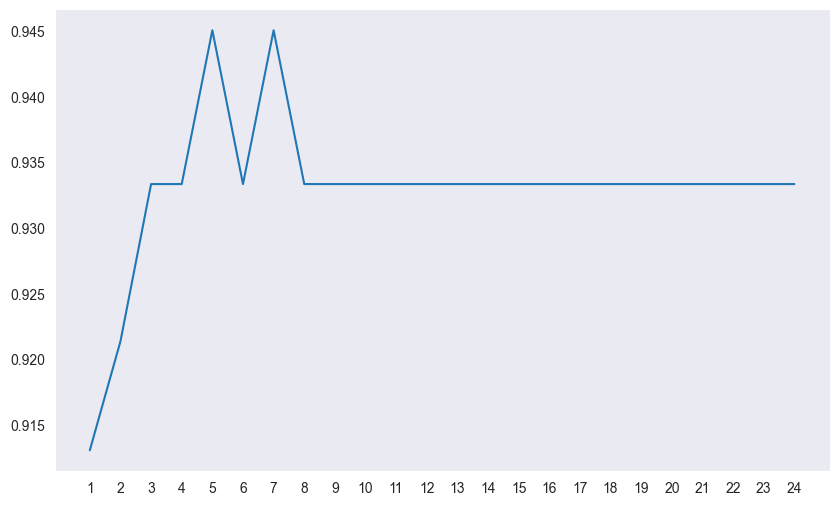

In [30]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

### Grid Search yordamida

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [32]:
knn_gscv.cv_results_['rank_test_score']

array([24, 21, 15, 10,  7,  3,  2,  4,  1,  4,  8,  8,  4, 11, 11, 13, 14,
       18, 18, 18, 22, 22, 16, 16], dtype=int32)

In [33]:
knn_gscv.best_params_

{'n_neighbors': np.int64(9)}

In [34]:
knn_gscv.best_score_

np.float64(0.968390001552554)

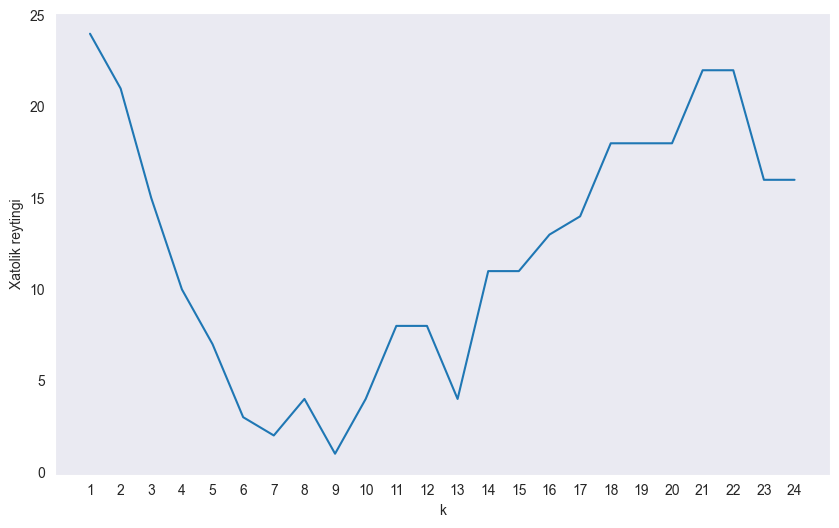

In [35]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()